## Logistic regression with Scikit-learn Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# drop rows where the values are empty
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\3105313113.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation=90, ha='right');


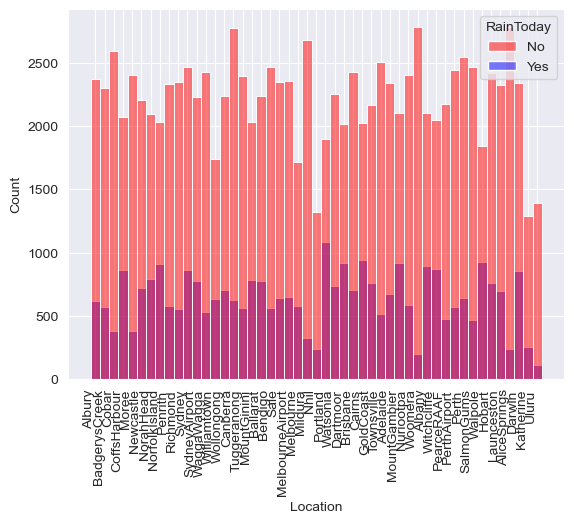

In [6]:
s = sns.histplot(df, x='Location', hue='RainToday', hue_order=["No", "Yes"], palette={"Yes": 'blue', "No":"Red"})

s.set_xticklabels(s.get_xticklabels(), rotation=90, ha='right');

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\811669531.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation=90, ha='right');


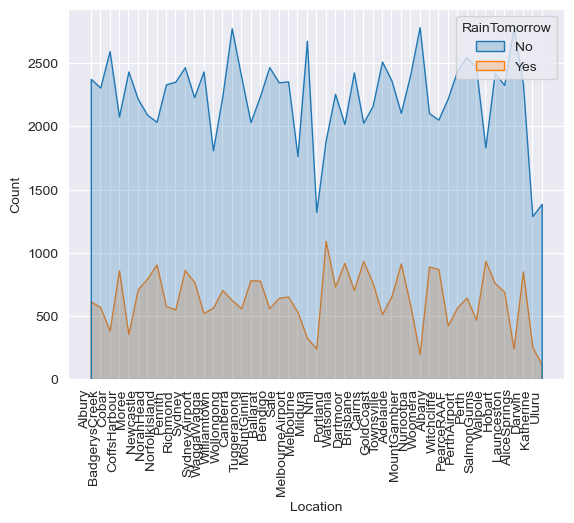

In [7]:
s = sns.histplot(df, x='Location', hue='RainTomorrow', element='poly')

s.set_xticklabels(s.get_xticklabels(), rotation=90, ha='right');

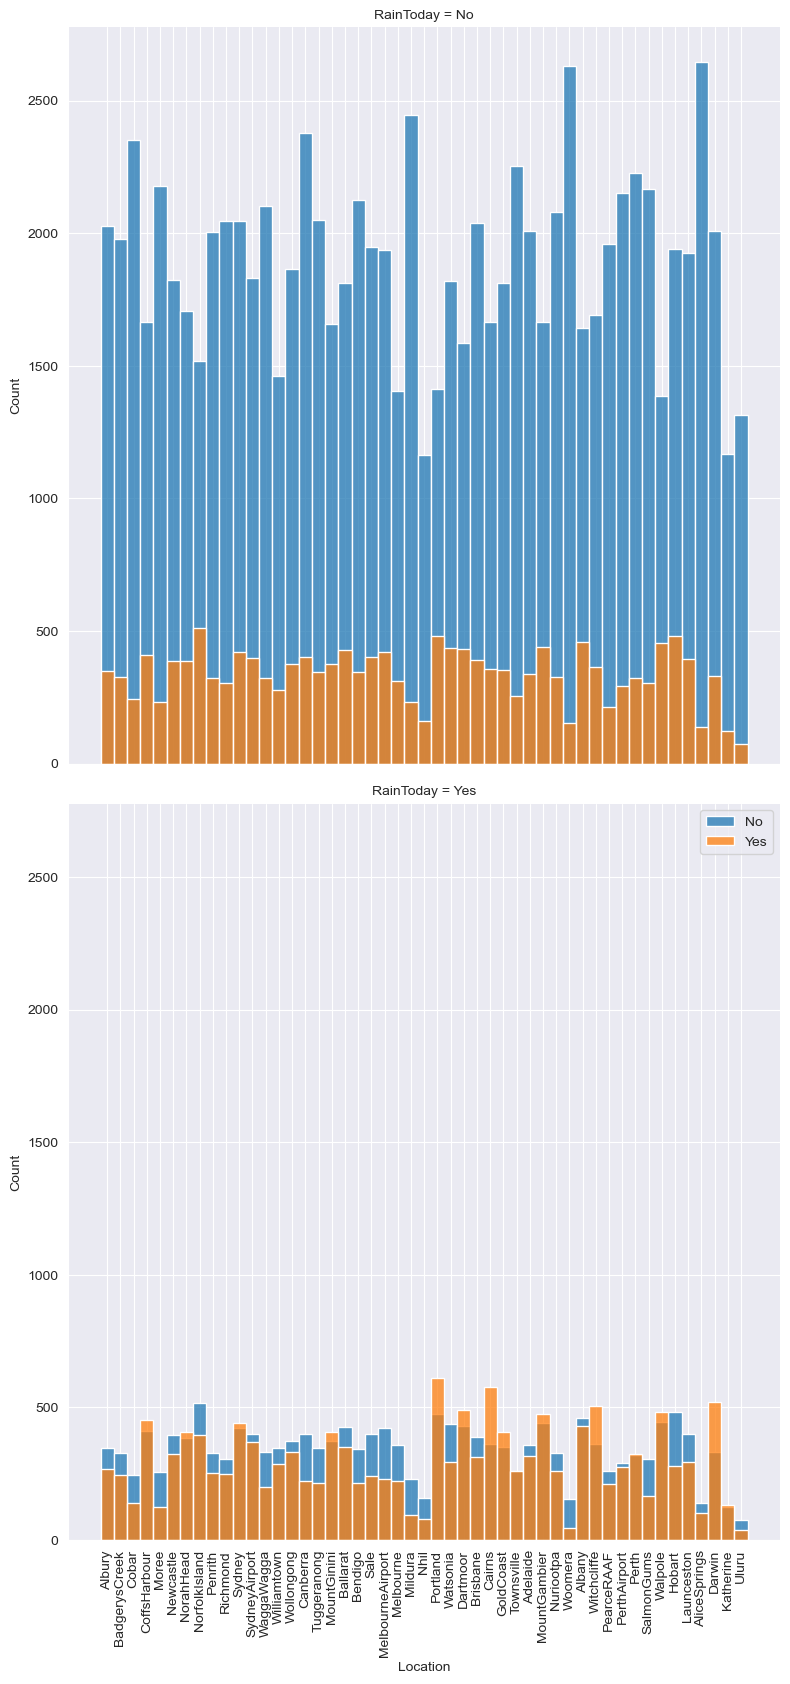

In [8]:
g = sns.FacetGrid(df, col='RainToday', col_wrap=1, hue='RainTomorrow', height=8)

g.map(sns.histplot, 'Location')


plt.xticks(df['Location'].unique(), rotation=90);
plt.legend();

Text(0.5, 1.0, 'Temperature at 3pm vs Rain Today')

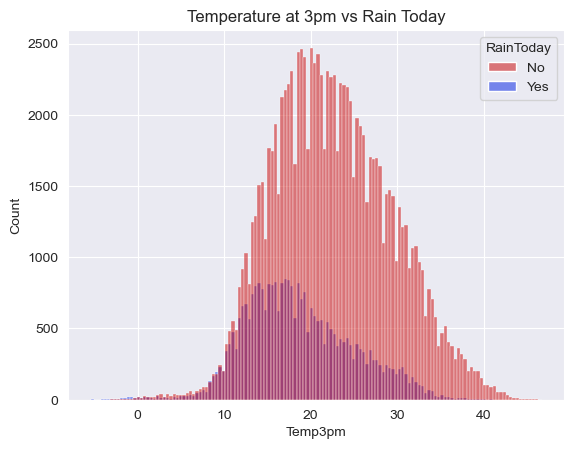

In [9]:
yes_no_palette ={"Yes": '#001fe5', 'No': '#c90000'}
s = sns.histplot(df, x='Temp3pm', hue='RainToday', palette=yes_no_palette)
s.set_title("Temperature at 3pm vs Rain Today")

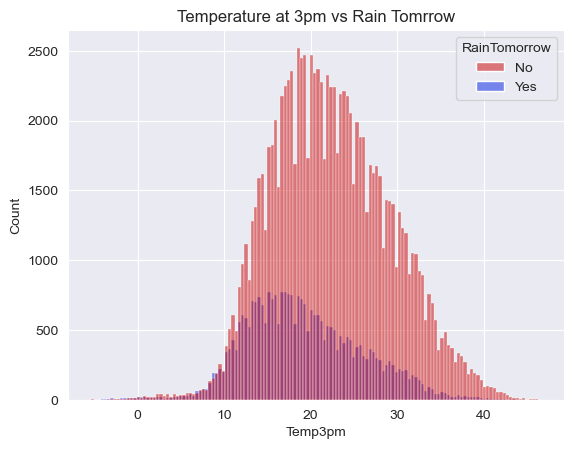

In [10]:
s = sns.histplot(df, x='Temp3pm', hue='RainTomorrow', palette=yes_no_palette)
s.set_title("Temperature at 3pm vs Rain Tomrrow");

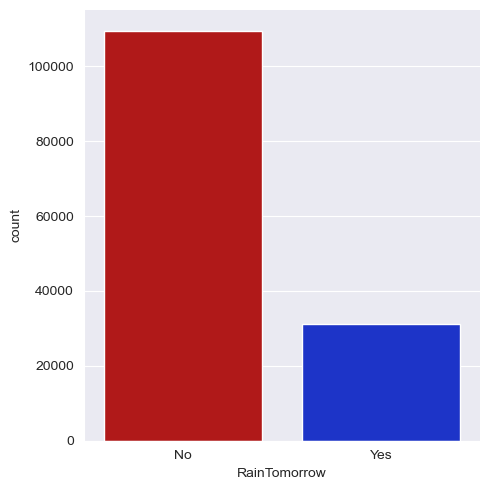

In [11]:
sns.catplot(x='RainTomorrow', kind='count', data=df, palette=yes_no_palette)

<Axes: xlabel='RainToday', ylabel='Count'>

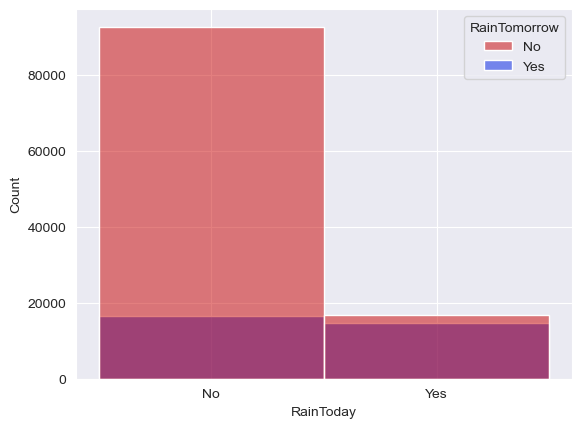

In [12]:
sns.histplot(x='RainToday', hue="RainTomorrow", data=df, palette=yes_no_palette)

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

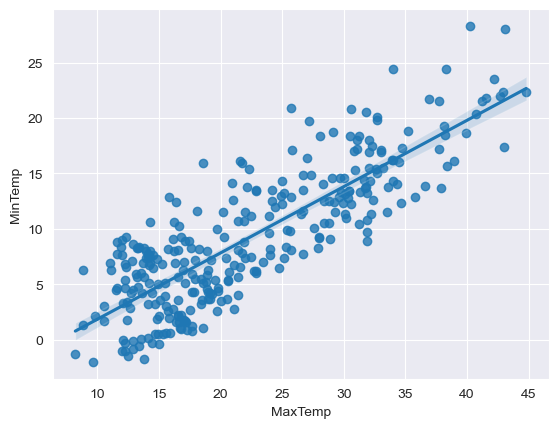

In [13]:
sns.regplot(x='MaxTemp', y='MinTemp', data=df.head(300))

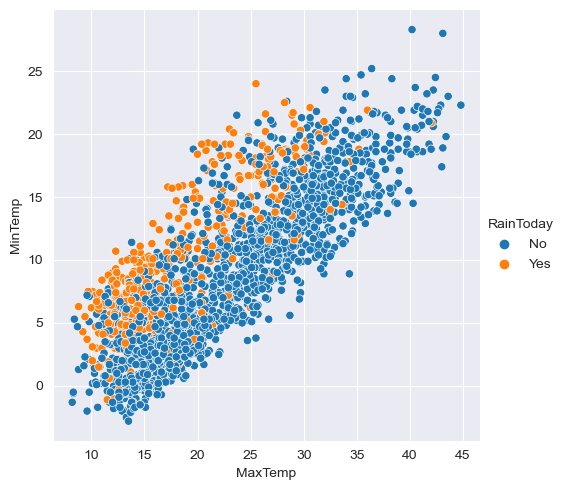

In [14]:
sns.relplot(x='MaxTemp', hue='RainToday', y='MinTemp', data=df.head(2000))

In [15]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

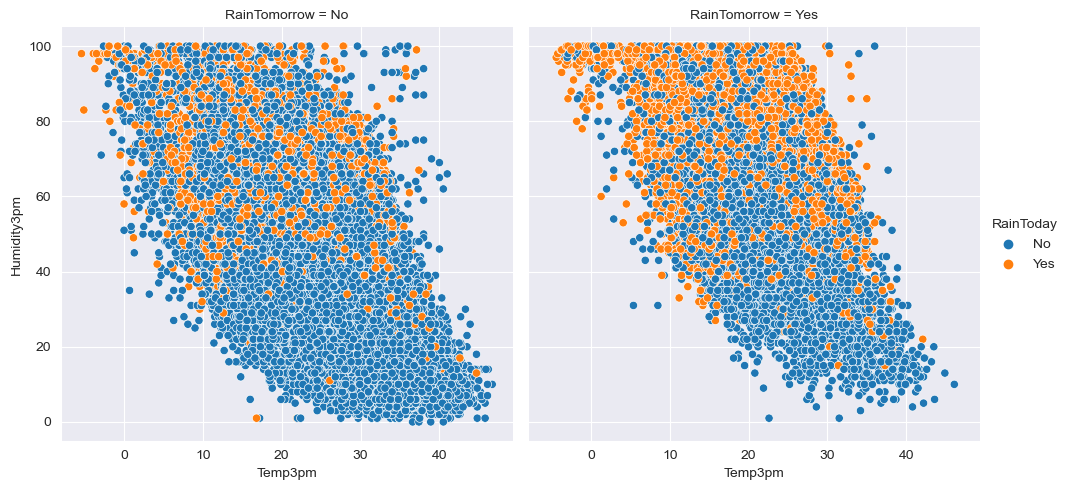

In [16]:
sns.relplot(x='Temp3pm', y="Humidity3pm", data=df, hue="RainToday", col="RainTomorrow")

In [17]:
use_sample = False
sample_fraction = 0.1

In [18]:
if use_sample:
    df = df.sample(frac=sample_fraction).copy()

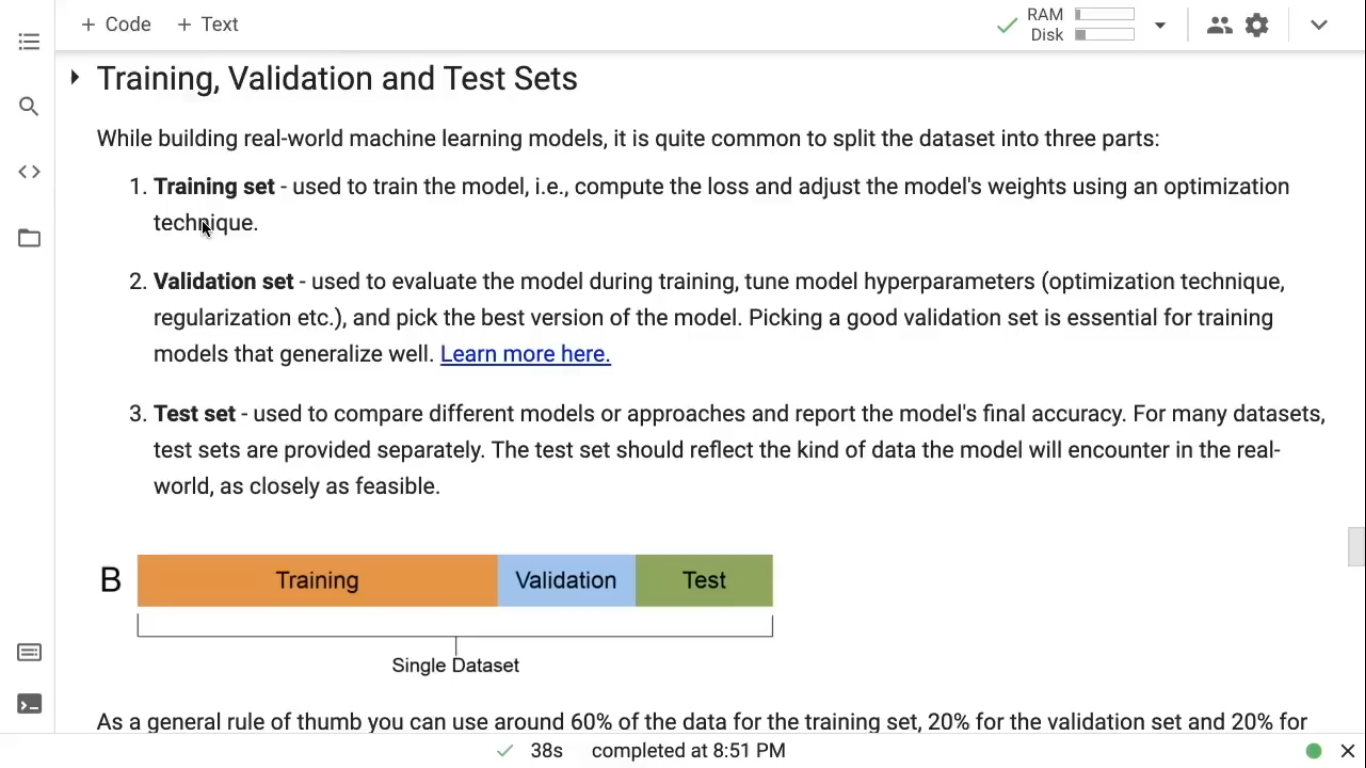

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42) 
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [21]:
df.shape, train_val_df.shape, test_df.shape, train_df.shape, val_df.shape

((140787, 23), (112629, 23), (28158, 23), (84471, 23), (28158, 23))

##### However while working with dates, its often a better idea to separate the training, validation and tests sets with time, so that the model is trained on  the data from the past and evaluated on data from the future
For the current dataset, we can use the Date column in the dataset to craete another column for Year. We'll pick the last two years for the test sete, and pne year before it for the validation set

In [22]:
year = pd.DatetimeIndex(df.Date).year
year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=140787)

<Axes: xlabel='Date', ylabel='count'>

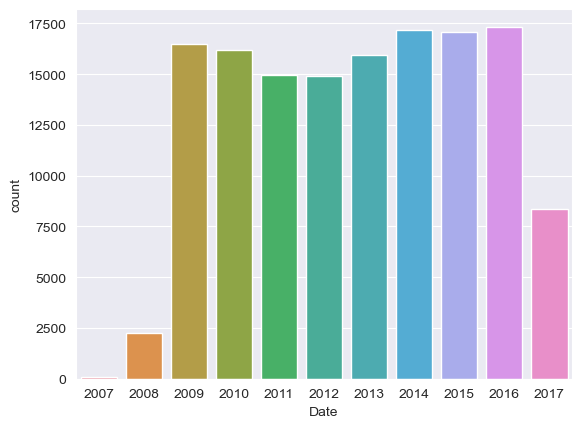

In [23]:
# plt.title("No. Of Rows per Year")
sns.countplot( x=pd.to_datetime(df.Date).dt.year)

In [24]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

### Identifying Input and Target Columns
Often not all columns in a dataset are useful for training a model. In the current dataset, we can ignore the Date column since we only want to make a prediction about whether it will the rain the next day

In [25]:
input_cols = list(train_df.columns)[1:-1]
target_column = "RainTomorrow"

In [26]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_column].copy()

In [27]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_column].copy()

In [28]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_column].copy()

In [29]:
train_inputs


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [30]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [31]:
val_inputs.isna().sum()

Location            0
MinTemp            34
MaxTemp            29
Rainfall            0
Evaporation      8335
Sunshine         9038
WindGustDir       893
WindGustSpeed     875
WindDir9am       1099
WindDir3pm        511
WindSpeed9am       71
WindSpeed3pm      362
Humidity9am       212
Humidity3pm       661
Pressure9am      1977
Pressure3pm      1977
Cloud9am         6506
Cloud3pm         6933
Temp9am            22
Temp3pm           471
RainToday           0
dtype: int64

In [32]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

#### Input missing numeric data

In [33]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='mean')

In [34]:
df[numerical_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [35]:
train_inputs[numerical_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [36]:
imputer.fit(df[numerical_cols])

SimpleImputer()

In [37]:
# list(imputer.statistics_)

In [38]:
imputer.transform(train_inputs[numerical_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [39]:
# df['Cloud3pm'].mean()

In [40]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])

In [41]:
# train_inputs[numeric_cols]

In [42]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
# train_inputs[numerical_cols].isna().sum()

##### Another way is to use MinMaxScaler from sklearn.preprocessing to scale values to the (0, 1) range

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
# df.isna().sum()
scaler = MinMaxScaler()

In [45]:
scaler.fit(df[numerical_cols])

MinMaxScaler()

In [46]:
scaler.data_min_, scaler.data_max_

(array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
          0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4]),
 array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
         100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.7]))

In [47]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])

In [48]:
train_inputs.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [49]:
# train_inputs[numerical_cols].describe()

In [50]:
df2 = df[categorical_cols].fillna("Unknown")

### For the categorical columns

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [53]:
one_hot.fit(df2)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [54]:
list(one_hot.categories_)

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [ ]:
len()

In [55]:
one_hot_cols = list(one_hot.get_feature_names_out(categorical_cols))

In [56]:
train_inputs[categorical_cols].fillna("Unknown")
val_inputs[categorical_cols].fillna("Unknown")
test_inputs[categorical_cols].fillna("Unknown")

Location WindGustDir WindDir9am WindDir3pm RainToday
2498     Albury         ENE    Unknown        ESE        No
2499     Albury         SSE        SSE         SE        No
2500     Albury         ENE        ESE        ENE       Yes
2501     Albury         SSE         SE        SSE       Yes
2502     Albury         ENE         SE        SSE       Yes
...         ...         ...        ...        ...       ...
145454    Uluru           E        ESE          E        No
145455    Uluru           E         SE        ENE        No
145456    Uluru         NNW         SE          N        No
145457    Uluru           N         SE        WNW        No
145458    Uluru          SE        SSE          N        No

[25710 rows x 5 columns]

In [57]:
train_inputs[one_hot_cols] = one_hot.transform(train_inputs[categorical_cols]) 

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\1460780841.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[one_hot_cols] = one_hot.transform(train_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\1460780841.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[one_hot_cols] = one_hot.transform(train_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\1460780841.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [58]:
test_inputs[one_hot_cols] = one_hot.transform(test_inputs[categorical_cols]) 

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\3740491076.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[one_hot_cols] = one_hot.transform(test_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\3740491076.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[one_hot_cols] = one_hot.transform(test_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\3740491076.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usual

In [59]:
val_inputs[one_hot_cols] = one_hot.transform(val_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\1701617339.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[one_hot_cols] = one_hot.transform(val_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\1701617339.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[one_hot_cols] = one_hot.transform(val_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_25400\1701617339.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

In [60]:
data_shapes = pd.DataFrame(dict(name=['train_inputs', 'train_targets', 'val_inputs', 'val_targets', 'test_inputs', 'test_targets'],
                            shape=[train_inputs.shape, train_targets.shape, val_inputs.shape,
                        val_targets.shape, test_inputs.shape, test_targets.shape]))
data_shapes


name         shape
0   train_inputs  (97988, 123)
1  train_targets      (97988,)
2     val_inputs  (17089, 123)
3    val_targets      (17089,)
4    test_inputs  (25710, 123)
5   test_targets      (25710,)

In [61]:
%%time
!pip install pyarrow

CPU times: total: 0 ns
Wall time: 7.33 s


In [62]:
train_inputs.to_parquet('train_inputs.parquet')
test_inputs.to_parquet("test_inputs.parquet")
val_inputs.to_parquet("val_inputs.to_parquet")

In [63]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(test_targets).to_parquet("test_targets.parquet")
pd.DataFrame(val_targets).to_parquet("val_targets.to_parquet")

In [64]:
train_inputs = pd.read_parquet('train_inputs.parquet')
test_inputs = pd.read_parquet("test_inputs.parquet")
val_inputs = pd.read_parquet("val_inputs.to_parquet")

In [65]:
train_targets = pd.read_parquet('train_targets.parquet')
test_targets = pd.read_parquet("test_targets.parquet")
val_targets = pd.read_parquet("val_targets.to_parquet")

In [66]:
train_inputs[numerical_cols + one_hot_cols].shape

(97988, 118)

In [99]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2498           ENE       0.372093       None        ESE  ...            0.0   
2499           SSE       0.341085        SSE         SE  ...            1.0   
2500           ENE       0.325581        ESE        ENE  ...            0.0   
2501           SSE       0.255814         SE        SSE  ...            0.0   
2502           ENE       0.193798         SE        SSE  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
145454           E       0.193798        ESE          E  ...            0.0   
145455           E       0.193798         SE        ENE  ...            0.0   
145456         NNW       0.124031         SE          N  ...            0.0   
145457           N       0.240310         SE        WNW  ...            0.0   
145458          SE       0.170543        SSE          N  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  \
2498               0.0             0.0            0.0                 0.0   
2499               0.0             0.0            0.0                 0.0   
2500               0.0             0.0            0.0                 0.0   
2501               1.0             0.0            0.0                 0.0   
2502               1.0             0.0            0.0                 0.0   
...                ...             ...            ...                 ...   
145454             0.0             0.0            0.0                 0.0   
145455             0.0             0.0            0.0                 0.0   
145456             0.0             0.0            0.0                 0.0   
145457             0.0             0.0            0.0                 0.0   
145458             0.0             0.0            0.0                 0.0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  \
2498             0.0             0.0             0.0           1.0   
2499             0.0             0.0             0.0           1.0   
2500             0.0             0.0             0.0           0.0   
2501             0.0             0.0             0.0           0.0   
2502             0.0             0.0             0.0           0.0   
...              ...             ...             ...           ...   
145454           0.0             0.0             0.0           1.0   
145455           0.0             0.0             0.0           1.0   
145456           0.0             0.0             0.0           1.0   
145457           0.0             1.0             0.0           1.0   
145458           0.0             0.0             0.0           1.0   

        RainToday_Yes  
2498              0.0  
2499              0.0  
2500              1.0  
2501              1.0  
2502              1.0  
...               ...  
145454            0.0  
145455            0.0  
145456            0.0  
145457            0.0  
145458            0.0  

[25710 rows x 123 columns]

### Training Logistic Regression
- We take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- This number represents the probability of the input being classified as "Yes"
- Instead of RMSE, the cross entropys loss function is used to evaluate the results

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
%%time
model = LogisticRegression(solver='liblinear')

CPU times: total: 0 ns
Wall time: 5 ms


In [69]:
model.fit(train_inputs[numerical_cols + one_hot_cols], train_targets.values.ravel())

LogisticRegression(solver='liblinear')

In [70]:
numerical_cols + one_hot_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [71]:
list(model.coef_.tolist())

[[0.8941424216169008,
  -2.8835891247180236,
  3.167052486644063,
  0.8748665753535303,
  -1.6712320062772936,
  6.767342151899505,
  -0.9348314197044847,
  -1.4305380843115751,
  0.3216896776920996,
  5.9983131199339175,
  5.479439226263553,
  -9.193079377766253,
  -0.16172454800276356,
  1.2877532834789773,
  0.4742806283187178,
  2.0306456870441045,
  0.6006290091288708,
  -0.5482290025566142,
  0.47582632514854,
  0.005401660100331357,
  0.3448874871739752,
  -0.3541928639067511,
  0.17792095320800919,
  0.43981847496021725,
  -0.015372540948212417,
  0.027473715956913922,
  0.2569425779095438,
  -0.02188139027730932,
  -0.044852422743148955,
  -0.4845269834964126,
  -0.13899140793307163,
  -0.5770419527610814,
  -0.7889841413605605,
  -0.25772635470450805,
  -0.33014653304147273,
  -0.5704341747101493,
  0.08010357715732214,
  0.010433281492073268,
  0.06303063417123109,
  -0.9041892326081099,
  -0.4425412507503506,
  0.003623790234781785,
  -0.462336486870629,
  -0.46669916296193

In [72]:
model.intercept_

array([-2.51736678])

In [73]:
weights_df = pd.DataFrame({
    "values": np.append(numerical_cols + one_hot_cols, "Inercerpt (B)"),
    "slopes": np.append(model.coef_, model.intercept_)
}).sort_values("slopes", ascending=False)

Features with positive slopes contribute positively to the prediction that it will rain tomorrow. For example, WindGustSpeed, Humidity3pm, and Pressure9am have relatively high positive slopes, indicating that higher values of these features make it more likely to rain tomorrow.

In [74]:
weights_df.iloc[:60]

values    slopes
5             WindGustSpeed  6.767342
9               Humidity3pm  5.998313
10              Pressure9am  5.479439
2                  Rainfall  3.167052
15                  Temp3pm  2.030646
13                 Cloud3pm  1.287753
0                   MinTemp  0.894142
3               Evaporation  0.874867
62     Location_Witchcliffe  0.702321
47           Location_Perth  0.606892
16        Location_Adelaide  0.600629
18          Location_Albury  0.475826
14                  Temp9am  0.474281
46         Location_Penrith  0.448739
23        Location_Brisbane  0.439818
48    Location_PerthAirport  0.426065
52      Location_SalmonGums  0.423491
87           WindDir9am_NNE  0.404348
56     Location_Tuggeranong  0.364067
20   Location_BadgerysCreek  0.344887
8               Humidity9am  0.321690
85             WindDir9am_N  0.290294
26           Location_Cobar  0.256943
50        Location_Richmond  0.248535
98           WindDir9am_WSW  0.244553
86            WindDir9am_NE  0.239470
83           WindDir9am_ENE  0.230846
105          WindDir3pm_NNW  0.216018
89            WindDir9am_NW  0.203704
97           WindDir9am_WNW  0.203629
94            WindDir9am_SW  0.200497
88           WindDir9am_NNW  0.198930
45      Location_PearceRAAF  0.189934
59         Location_Walpole  0.184513
58      Location_WaggaWagga  0.182831
57           Location_Uluru  0.181950
22         Location_Bendigo  0.177921
96             WindDir9am_W  0.173818
106           WindDir3pm_NW  0.153484
36         Location_Mildura  0.080104
93           WindDir9am_SSW  0.065738
38    Location_MountGambier  0.063031
25        Location_Canberra  0.027474
61     Location_Williamtown  0.016776
37           Location_Moree  0.010433
19    Location_AliceSprings  0.005402
41            Location_Nhil  0.003624
95       WindDir9am_Unknown  0.000000
112      WindDir3pm_Unknown  0.000000
78      WindGustDir_Unknown  0.000000
24          Location_Cairns -0.015373
27    Location_CoffsHarbour -0.021881
49        Location_Portland -0.029343
102            WindDir3pm_N -0.030714
28        Location_Dartmoor -0.044852
91            WindDir9am_SE -0.047256
53          Location_Sydney -0.057611
82             WindDir9am_E -0.058592
84           WindDir9am_ESE -0.068133
44       Location_Nuriootpa -0.070649

In [75]:
weights_df.iloc[60:]

values    slopes
114             WindDir3pm_WNW -0.101640
54      Location_SydneyAirport -0.114464
74              WindGustDir_SE -0.124617
30          Location_GoldCoast -0.138991
75             WindGustDir_SSE -0.142800
92              WindDir9am_SSE -0.144869
90                WindDir9am_S -0.147832
104             WindDir3pm_NNE -0.149098
67             WindGustDir_ESE -0.154742
12                    Cloud9am -0.161725
77              WindGustDir_SW -0.183015
76             WindGustDir_SSW -0.186460
64            Location_Woomera -0.194250
73               WindGustDir_S -0.203106
100             WindDir3pm_ENE -0.221217
113               WindDir3pm_W -0.248889
60           Location_Watsonia -0.250315
66             WindGustDir_ENE -0.251020
72              WindGustDir_NW -0.251186
65               WindGustDir_E -0.253925
33         Location_Launceston -0.257726
71             WindGustDir_NNW -0.257845
81             WindGustDir_WSW -0.292966
101             WindDir3pm_ESE -0.303678
99                WindDir3pm_E -0.308304
108              WindDir3pm_SE -0.310243
79               WindGustDir_W -0.315570
68               WindGustDir_N -0.315988
51               Location_Sale -0.322997
69              WindGustDir_NE -0.324416
34          Location_Melbourne -0.330147
107               WindDir3pm_S -0.333659
115             WindDir3pm_WSW -0.344136
80             WindGustDir_WNW -0.350588
21           Location_Ballarat -0.354193
103              WindDir3pm_NE -0.380363
110             WindDir3pm_SSW -0.385076
70             WindGustDir_NNE -0.413325
109             WindDir3pm_SSE -0.435404
111              WindDir3pm_SW -0.438194
40          Location_Newcastle -0.442541
42          Location_NorahHead -0.462336
43      Location_NorfolkIsland -0.466699
29             Location_Darwin -0.484527
17             Location_Albany -0.548229
35   Location_MelbourneAirport -0.570434
31             Location_Hobart -0.577042
55         Location_Townsville -0.730251
32          Location_Katherine -0.788984
63         Location_Wollongong -0.801547
39        Location_MountGinini -0.904189
6                 WindSpeed9am -0.934831
117              RainToday_Yes -1.009824
7                 WindSpeed3pm -1.430538
116               RainToday_No -1.507543
4                     Sunshine -1.671232
118              Inercerpt (B) -2.517367
1                      MaxTemp -2.883589
11                 Pressure3pm -9.193079

In [76]:
plt.savefig('slopes.png', dpi=500)

sns.barplot(data=weights_df, x='slopes', y='values')


<Axes: xlabel='slopes', ylabel='values'>

In [77]:
train_predictions = model.predict(train_inputs[numerical_cols + one_hot_cols])

In [78]:
pd.DataFrame(train_predictions).value_counts()

No     82501
Yes    15487
dtype: int64

In [79]:
train_predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [80]:
train_targets

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

### Checking Accuracy

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(train_predictions,train_targets)
#85% of the results are accurate

0.8519716700004082

#### we can also indicate the probabilities for the target classes No and Yes

In [83]:
train_probs = model.predict_proba(train_inputs[numerical_cols + one_hot_cols])

In [84]:
list(np.round(train_probs.tolist(), decimals=2) * 100)

[array([94.,  6.]),
 array([94.,  6.]),
 array([96.,  4.]),
 array([99.,  1.]),
 array([72., 28.]),
 array([88., 12.]),
 array([94.,  6.]),
 array([98.,  2.]),
 array([77., 23.]),
 array([96.,  4.]),
 array([98.,  2.]),
 array([ 9., 91.]),
 array([ 1., 99.]),
 array([64., 36.]),
 array([72., 28.]),
 array([15., 85.]),
 array([91.,  9.]),
 array([97.,  3.]),
 array([98.,  2.]),
 array([92.,  8.]),
 array([94.,  6.]),
 array([95.,  5.]),
 array([97.,  3.]),
 array([98.,  2.]),
 array([89., 11.]),
 array([91.,  9.]),
 array([94.,  6.]),
 array([22., 78.]),
 array([92.,  8.]),
 array([87., 13.]),
 array([97.,  3.]),
 array([98.,  2.]),
 array([98.,  2.]),
 array([97.,  3.]),
 array([96.,  4.]),
 array([94.,  6.]),
 array([97.,  3.]),
 array([98.,  2.]),
 array([93.,  7.]),
 array([94.,  6.]),
 array([98.,  2.]),
 array([96.,  4.]),
 array([98.,  2.]),
 array([96.,  4.]),
 array([95.,  5.]),
 array([99.,  1.]),
 array([99.,  1.]),
 array([98.,  2.]),
 array([85., 15.]),
 array([87., 13.]),


In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(train_targets, train_predictions, normalize='true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

In [87]:
cf = confusion_matrix(train_targets, train_predictions, normalize='true')

<Axes: >

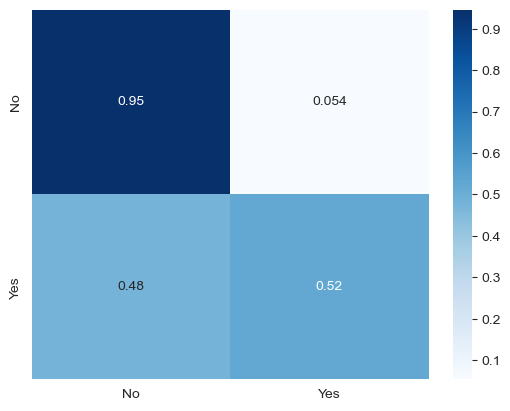

In [88]:
sns.heatmap(cf, cmap='Blues', annot=True, xticklabels=['No','Yes'], yticklabels=['No','Yes'])

In [89]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title(f"{name} Confusion matrix")
    plt.show()
    return preds


Accuracy: 85.41%


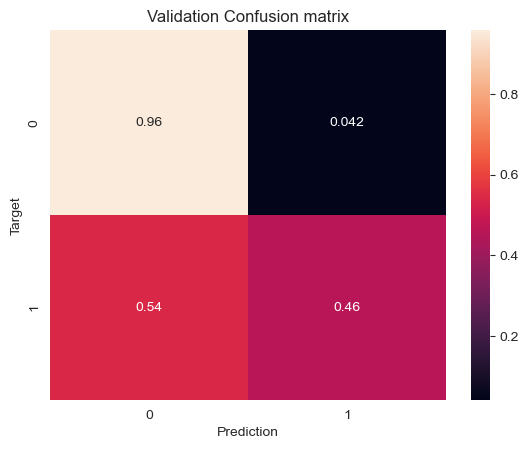

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [90]:
predict_and_plot(val_inputs[numerical_cols +  one_hot_cols], val_targets, name='Validation')


In [91]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], inputs)

In [92]:
def all_no(inputs):
    return np.full(inputs, "No")

In [93]:
X_tests = test_targets.shape[0]

In [94]:
accuracy_score(test_targets, all_no(X_tests))
# dir(train_predictions)

0.7734344612991054

### Saving and Loading trained models

In [95]:
import joblib

In [96]:
joblib.dump({
    'model': model,
    'imputer': imputer,
    'scaler': scaler, 
    'encoder': one_hot,
    'input_cols': input_cols,
    'target_column': target_column,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'one_hot_cols': one_hot_cols,
}, 'australia_rain.joblib')

['australia_rain.joblib']

In [97]:
aussie_rain_2  = joblib.load('australia_rain.joblib')

In [98]:
# test_predict = aussie_rain_2['model'].predict([])